## 루브릭
1. 자기만의 카메라앱 기능 구현을 완수하였다.
    - 얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.
2. 스티커 이미지를 정확한 원본 위치에 반영하였다.
    - 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.
    - 얼굴각도, 이미지 밝기, 촬영 거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

### 필요한 라이브러리 불러오기

In [31]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

### 이미지 불러오기

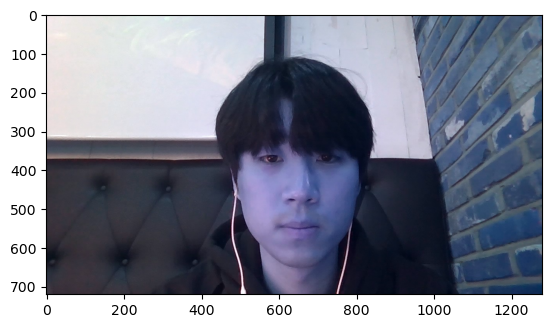

In [32]:
img_path = 'Img/'

img = cv2.imread(img_path + '1.jpg')
img_show = img.copy()
plt.imshow(img)
plt.show()

opencv를 이용하여 이미지를 불러오기 되면 RGB가 아닌 BGR을 사용하기 때문에 cvtColor 함수를 이용하여 RGB로 바꿔줍니다

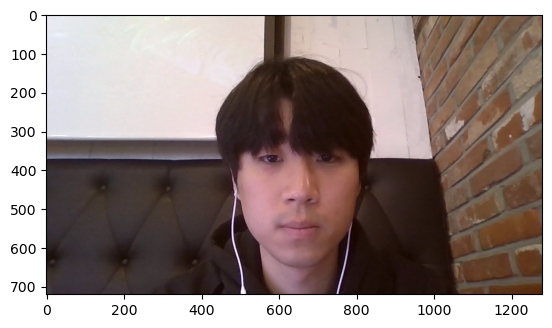

In [33]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

사용할 detector인 HOG detector를 선언해줍니다.

In [34]:
detector_hog = dlib.get_frontal_face_detector()

In [35]:
dlib_rects = detector_hog(img_rgb, 1)

HOG detector를 이용하여 input 이미지의 face를 detect 해보자.

rectangles[[(491, 313) (812, 634)]]


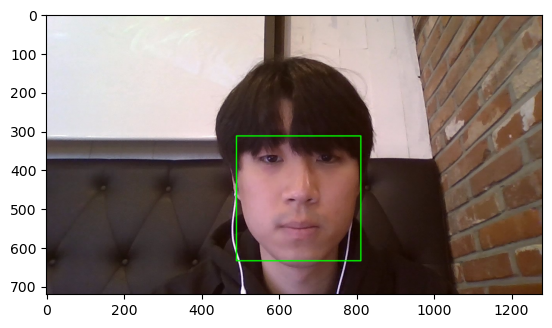

In [36]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

pretrain 되어 있는 model을 불러와 landmark를 찾아보자

In [37]:
model_path = 'Img/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)

In [38]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)

    list_points = list(map(lambda p: (p.x, p.y), points.parts()))

    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


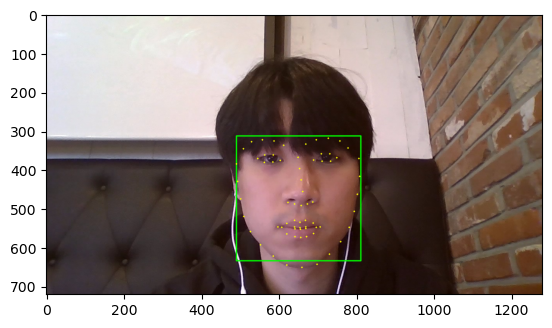

In [39]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

In [40]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    h = int(h/2)
    print(f'(x,y) : ({x}, {y})')
    print(f'(w,h) : ({w}, {h})')

(662, 456)
(x,y) : (662, 456)
(w,h) : (322, 161)


In [41]:
sticker_path = 'Img/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)


(161, 322, 3)


In [42]:
refined_x = x - w//2
refined_y = y - h//2

print(f'(x,y) : ({refined_x}, {refined_y})')

(x,y) : (501, 376)


In [43]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print(f'(x,y) : ({refined_x}, {refined_y})')


(x,y) : (501, 376)


In [44]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

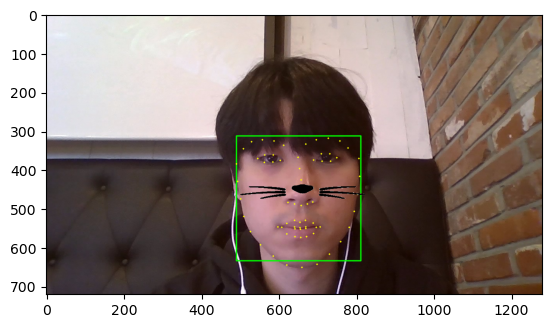

In [45]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

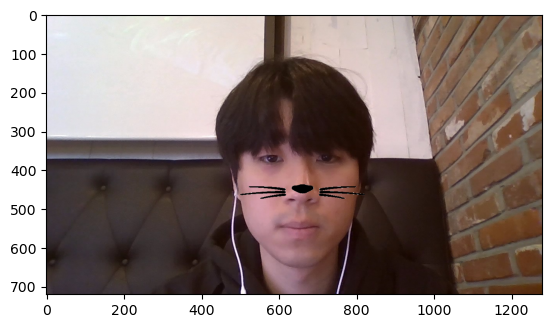

In [46]:
sticker_area = img[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
 
img[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

기본 형태에서는 다음과 같은 이미지가 형성 되는 것을 확인 했으니 얼굴의 각도, 밝기, 촬영 거리 등 변수를 고려해서 이미지를 생성해보자.

(659, 490)


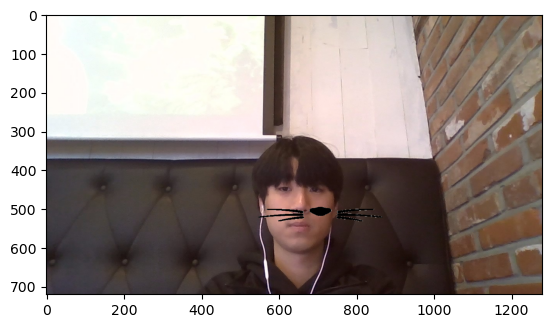

In [47]:
#이미지 생성을 한 번에 하기 위해 위 코드들을 모아서 한 번에 돌리자...
img_path = 'Img/'

img = cv2.imread(img_path +'2.jpg')
img_show = img.copy()

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)

    list_points = list(map(lambda p: (p.x, p.y), points.parts()))

    list_landmarks.append(list_points)


for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    h = int(h/2)

refined_x = x - w//2
refined_y = y - h//2

if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0


sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

sticker_area = img[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
 
img[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

(582, 510)


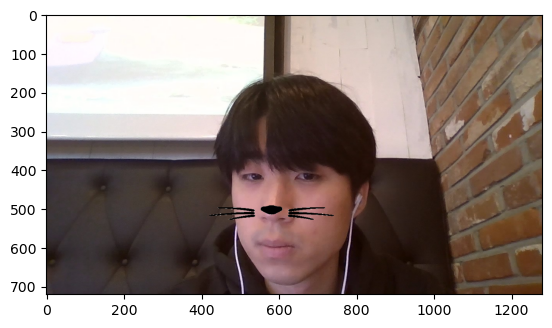

In [48]:
img_path = 'Img/'

img = cv2.imread(img_path +'4.jpg')
img_show = img.copy()

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)

    list_points = list(map(lambda p: (p.x, p.y), points.parts()))

    list_landmarks.append(list_points)


for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    h = int(h/2)

refined_x = x - w//2
refined_y = y - h//2

if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0


sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

sticker_area = img[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
 
img[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

(663, 509)


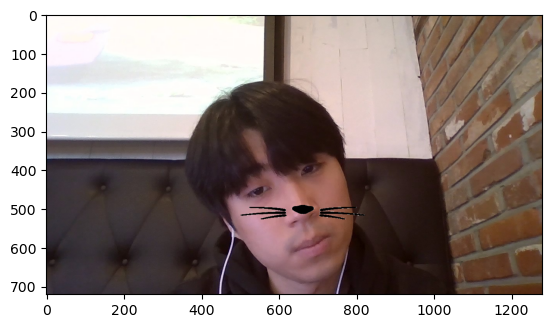

In [49]:
img_path = 'Img/'

img = cv2.imread(img_path +'6.jpg')
img_show = img.copy()

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)

    list_points = list(map(lambda p: (p.x, p.y), points.parts()))

    list_landmarks.append(list_points)


for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    h = int(h/2)

refined_x = x - w//2
refined_y = y - h//2

if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0


sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

sticker_area = img[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
 
img[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

여러 이미지에 대해서 고양이 스티커를 붙여보았다. 기존 이미지와 같이 잘 합성이 되는 것도 있었지만 그렇지 않은 이미지도 존재했다.
이미지를 하나씩 살펴보자면 기존 이미지보다 멀어졌을 때, detect가 잘 이루어 지지 않은 것으로 보이고 멀어졌을 때에는 sticker도 좀 작아져야할 것 같다.
두 번째 이미지 고개를 돌렸을 땐 문제가 없이 고양이 스티커가 잘 붙었음을 확인할 수 있다.
마지막 세 번째 이미지는 고개의 각도를 틀게 되었을 땐, 스티커가 고정적이어서 이것을 돌려야 제대로 된 이미지라 할 수 있다고 생각한다.

적절한 size 조절과 각도 변경이 가능하게 수정한다면 이용할 수 있을 것 같다.